##**Nesse primeiro tutorial veremos o basico para a previsão com o NeuralProphet, que assim como o Prophet desenvovido pela Meta tem uma inspiração em uma das maiores bibliotecas de Machine Learning a Scikit-Learn, fazendo assim um dos termos mais dificeis do Ciência de Dados um pouco mais facil do que os modelos tradicionais que focam muito na Estatistica da previsão.**

In [ ]:
!pip uninstall -y torch notebook notebook_shim tensorflow tensorflow-datasets prophet torchaudio torchdata torchtext torchvision

!pip install neuralprophet


In [ ]:
import pandas as pd
from neuralprophet import NeuralProphet, set_log_level

In [ ]:
#carregando df
df = pd.read_csv("https://github.com/ourownstory/neuralprophet-data/raw/main/kaggle-energy/datasets/tutorial01.csv")

In [ ]:
df

,ds,y
0,2014-12-31,65.41
1,2015-01-01,62.09
2,2015-01-02,69.44
3,2015-01-03,65.22
4,2015-01-04,58.91
...,...,...
1457,2018-12-27,72.96
1458,2018-12-28,69.23
1459,2018-12-29,62.62
1460,2018-12-30,64.57


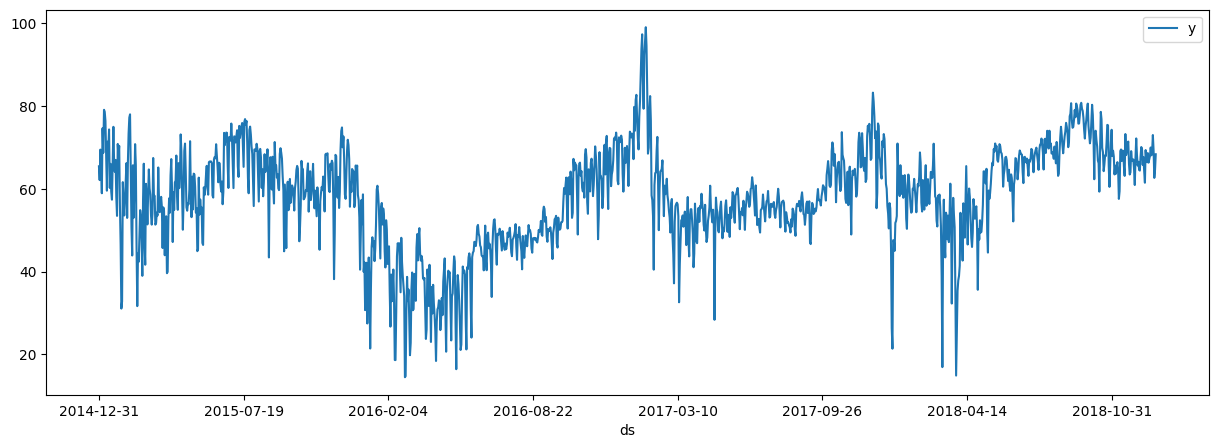

In [ ]:
#plotando o df
plt = df.plot(x='ds', y='y', figsize=(15,5))

In [ ]:
#desativar msgs de log exceto se for um erro
set_log_level("ERROR")

In [ ]:
#Criando um prophet model padrão
m = NeuralProphet()

In [ ]:
#adicionando static plotly
m.set_plotting_backend("plotly")

In [ ]:
#treinando o modelo
metrics = m.fit(df)

Finding best initial lr:   0%|          | 0/229 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

In [ ]:
#usando o make_future_dataframe para criar 365 dias a frente
df_future = m.make_future_dataframe(df, n_historic_predictions=True, periods=365)

In [ ]:
#predizendo o futuro
forecast = m.predict(df_future)

Predicting: 46it [00:00, ?it/s]

In [ ]:
#plotando dados prezentes e futuros
m.plot(forecast,figsize=(16,8))

In [ ]:
m.plot_parameters(components=["trend", "seasonality"])